#  Diabetic Readmission Prediction Project

This project aims to predict hospital readmissions among diabetic patients using a real-world clinical dataset of over 100,000 encounters. The analysis includes:

- Exploratory Data Analysis (EDA)
- Data Cleaning and Preprocessing
- Feature Engineering
- Predictive Modeling (Random Forest, XGBoost)
- Evaluation and Key Insights

---

##  Project Structure
- `diabetic_data.csv`: http://localhost:8888/lab/tree/diabetic_data.csv
- `notebook.ipynb`: http://localhost:8888/lab/tree/Diabetic_Readmission_Prediction_Polished.ipynb
- `README.md`: https://github.com/M-coder-cyber-02/Diabetic-Readmission-Prediction/blob/main/diabetes_readmission_README.md

---


#  Diabetic Patient Readmission Prediction

This project analyzes hospital readmission data of diabetic patients to predict readmission likelihood and identify influencing factors.

##  Objective

The primary goal is to build a predictive model for readmission and uncover key predictors influencing this outcome.

##  Dataset Overview

The dataset contains over 100,000 records of diabetic patients including demographic, diagnosis, and encounter details.

##  Exploratory Data Analysis (EDA)

Various visualizations are used to understand the distribution and relationships of features with readmission.

In [7]:
# Import necessary libraries and load the dataset
import pandas as pd
df = pd.read_csv('diabetic_data.csv')
# Preview the first few rows of the dataset
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
# Check the data types and non-null counts of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [9]:
# Get a statistical summary of numeric columns
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [10]:
#Checking class imbalance
df['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

This distribution indicates that the data is imbalanced, especially with respect to the <30 class, which is of primary interest when predicting early readmissions. This imbalance can affect model performance and may lead to poor detection of early readmissions. Therefore, techniques such as stratified splitting, resampling (SMOTE/undersampling), and evaluation metrics like recall and F1-score will be applied to address this issue.

## 4. Data Cleaning

Unnecessary columns are removed and missing or inconsistent values are handled appropriately.

In [17]:
#Handling missing values
import numpy as np

# Replace '?' placeholders with NaN values for consistency in missing value handling
df.replace('?', np.nan, inplace=True)

# Fill remaining missing values with a placeholder '-'
df.fillna('-', inplace=True)

In [18]:
# Dropping the weight column as it contains many missing values
df = df.drop('weight', axis=1)

In [19]:
#  Check how many missing values are left in each column
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitaz

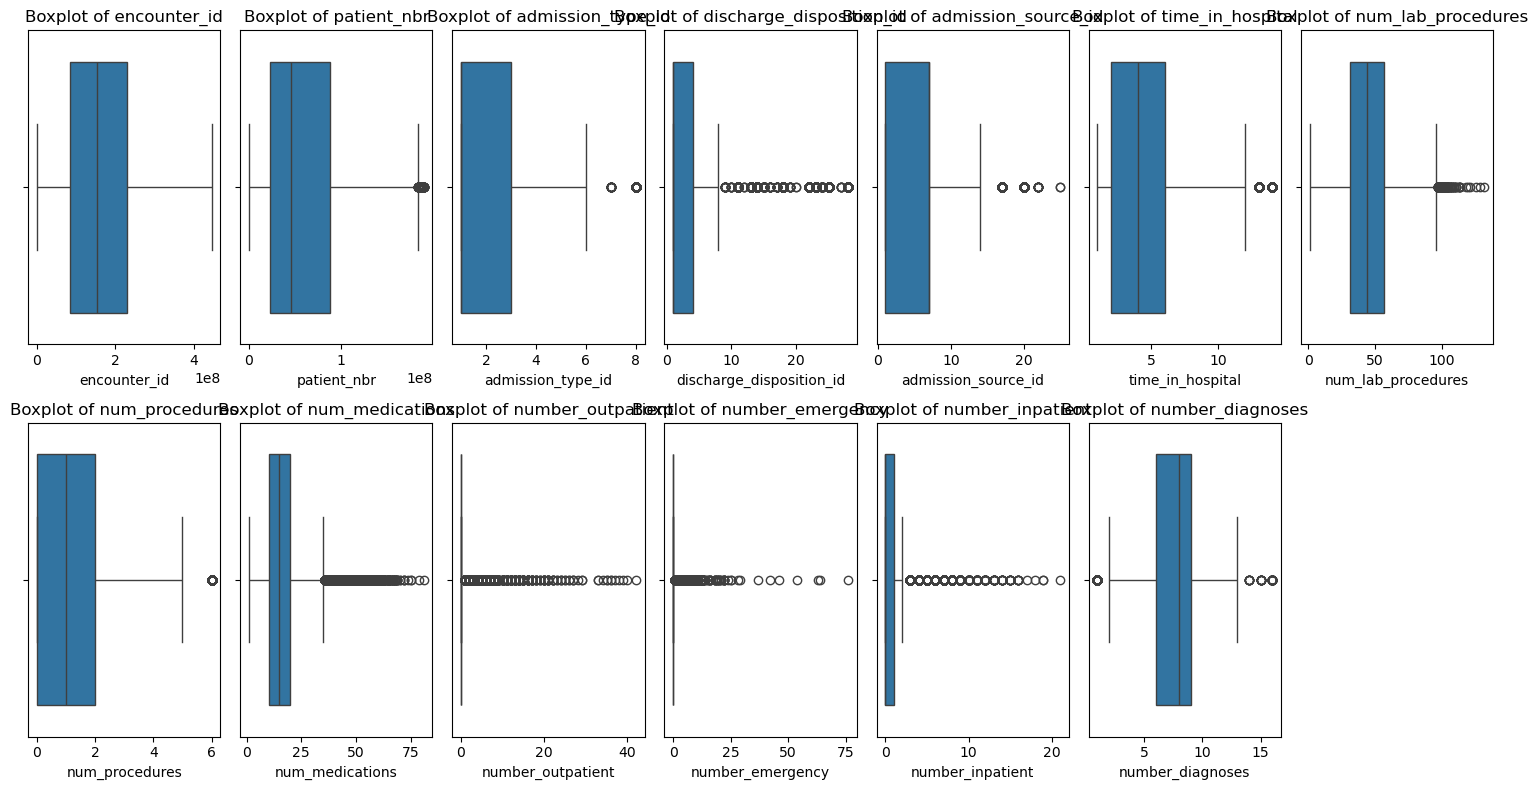

In [23]:
# Import visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to check for outliers
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot boxplots for each numerical feature
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, (len(num_cols)+1)//2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## 5. Visualize Age Distribution

 histogram was plotted to examine the distribution of patients' age groups.

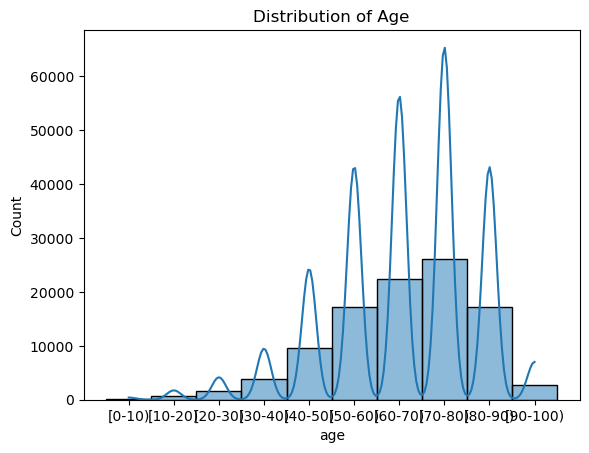

In [25]:
# Plot distribution of patient ages
sns.histplot(df['age'], kde=True)
plt.title("Distribution of Age")
plt.show()

## 6. Outlier Detection
A custom function detect_outliers_iqr() is defined to count the number of outliers in each numeric column based on the IQR method. This is used only for reporting purposes to identify which columns have significant outlier presence.

In [26]:

# Define a function to detect outliers using IQR (not applied directly here)

def detect_outliers_iqr(df):
    outlier_counts = {}
    numeric_cols = df.select_dtypes(include='number').columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
# Count outliers for this column
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return outlier_counts
    
# Run the function and sort the result
outliers_found = detect_outliers_iqr(df)

# Sort and display the columns with the most outliers
sorted_outliers = sorted(outliers_found.items(), key=lambda x: x[1], reverse=True)

# Print in a readable format
print("Outlier counts per column (descending):\n")
for col, count in sorted_outliers:
    print(f"{col}: {count}")

Outlier counts per column (descending):

number_outpatient: 16739
number_emergency: 11383
discharge_disposition_id: 9818
number_inpatient: 7049
admission_source_id: 6956
num_procedures: 4954
num_medications: 2557
time_in_hospital: 2252
admission_type_id: 341
number_diagnoses: 281
patient_nbr: 247
num_lab_procedures: 143
encounter_id: 0


## 7. Outlier Capping
After identifying columns with outliers, we define a subset of important clinical or operational features to cap their values using the same IQR method. This helps reduce skewness and potential model bias without dropping data.


In [30]:

# Define columns where we want to cap extreme values (outliers)
cols_to_clean = [
    'number_outpatient',
    'number_emergency',
    'number_inpatient',
    'num_procedures',
    'num_medications',
    'time_in_hospital',
    'num_lab_procedures'
]

# Cap outliers using IQR method to reduce skewness and improve model stability
def cap_selected_outliers_iqr(df, cols):
    df_capped = df.copy()
    for col in cols:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

# Apply outlier capping to the selected columns
df = cap_selected_outliers_iqr(df, cols_to_clean)

In [32]:
df.dtypes

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                       object
age                          object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
payer_code                   object
medical_specialty            object
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient            float64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                 

## 8. Feature Engineering and Data Transformation

New features like age groups, chronic disease count, risk factors, and normalized waiting days are created to improve model performance.

## 8.1 Aggregate Medication Count
We summed all non-'No' entries across 24 diabetes-related drug columns to compute a new feature total_meds, indicating how many medications a patient is taking.

In [35]:

#Summarizing medications into a single column
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'insulin']
df['total_meds'] = df[drugs].apply(lambda row: sum(row != 'No'), axis=1)


## 8.2 Diagnosis Code Categorization
ICD-9 diagnosis codes were grouped into broader medical categories (e.g., circulatory, respiratory, diabetes, injury, etc.) using a function categorize_diag. These replace the original diag_1, diag_2, and diag_3 columns.

In [36]:
#Categorizing diagnosis codes into broader medical categories
def categorize_diag(code):
    try:
        code = float(code)
        if 390 <= code <= 459 or code == 785:
            return 'circulatory'
        elif 460 <= code <= 519 or code == 786:
            return 'respiratory'
        elif 520 <= code <= 579 or code == 787:
            return 'digestive'
        elif 250 <= code < 251:
            return 'diabetes'
        elif 800 <= code <= 999:
            return 'injury'
        elif 710 <= code <= 739:
            return 'musculoskeletal'
        else:
            return 'other'
    except:
        return 'unknown'

# Apply categorization to diagnosis columns
for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col] = df[col].apply(categorize_diag)

# Drop original diagnosis columns
df.drop(['diag_1', 'diag_2', 'diag_3'], axis=1, inplace=True)

## 8.3 Convert Age Groups to Numeric Midpoints
Age ranges like [70-80) were mapped to their numeric midpoints (e.g., 75) to allow for numerical analysis.

In [37]:
# Convert age group intervals to numeric midpoints
age_map = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}
df['age'] = df['age'].map(age_map)

## 8.4 Risk Encoding for Lab Results
Glucose and A1C test results were mapped to ordinal risk scores to reflect severity:

None → 0

Norm → 1

>200 / >300 → Higher risk scores

In [38]:
# Map glucose and A1C results to ordinal risk scores
glu_map = {
    'None': 0,
    'Norm': 1,
    '>200': 2,
    '>300': 3
}
a1c_map = {
    'None': 0,
    'Norm': 1,
    '>7': 2,
    '>8': 3
}
df['max_glu_serum'] = df['max_glu_serum'].map(glu_map).fillna(0)
df['A1Cresult'] = df['A1Cresult'].map(a1c_map).fillna(0)

## 8.5 Medication Usage Trend Encoding
Medication usage trends (No, Up, Down, Steady) were encoded into numerical values from 0 to 3.

In [39]:
# Map medication use trends to numerical values
med_map = {
    'No': 0,
    'Down': 1,
    'Steady': 2,
    'Up': 3
}
med_cols = [
    'insulin', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
    'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
    'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin',
    'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone'
]
for col in med_cols:
    df[col] = df[col].map(med_map)

## 8.6 Binary Encoding for Change and Medication Status

change: Encoded as 1 if there was a change in medication, else 0

diabetesMed: Encoded as 1 if the patient is on diabetes medication, else 0

In [ ]:

# Map change and diabetes medication status to binary values
df['change'] = df['change'].map({'No': 0, 'Ch': 1})
df['diabetesMed'] = df['diabetesMed'].map({'No': 0, 'Yes': 1})


## 8.7 Target Variable Creation
The readmitted column was transformed into a binary target variable readmit_flag:

1 for readmission within 30 days (<30)

0 otherwise


In [41]:

# Create binary target variable: 1 if readmitted within 30 days, else 0
df['readmit_flag'] = df['readmitted'].apply(lambda x:1 if x=='<30' else 0)


## 8.8 One-Hot Encoding of Categorical Variables
Features such as race, gender, payer_code, and medical_specialty were one-hot encoded to be used in modeling.

In [42]:

# One-hot encode selected categorical features
df = pd.get_dummies(df, columns=['race', 'gender', 'payer_code', 'medical_specialty'])


## 8.9 Drop Redundant Columns
The original readmitted and diagnosis columns were dropped after transformation.



In [ ]:

# Drop original readmission column
df = df.drop('readmitted', axis=1)


## 8.10 New Interaction & Aggregate Features
Several derived features were created:

hospital_burden: Sum of all encounter types (inpatient, emergency, outpatient)

is_chronic: Flag for chronic condition (9+ diagnoses or hospital stay > 7 days)

total_encounters: Total number of medical visits

medication_intensity: Combination of total meds and number of medications

glucose_A1C_risk: Combined glucose and A1C result scores

In [43]:

# Feature engineering: create new aggregated and interaction features
df['hospital_burden'] = df['number_inpatient'] + df['number_emergency'] + df['number_outpatient']
df['is_chronic'] = np.where((df['number_diagnoses'] >= 9) | (df['time_in_hospital'] > 7), 1, 0)
df['total_encounters'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']
df['medication_intensity'] = df['num_medications'] + df['total_meds']
df['glucose_A1C_risk'] = df['max_glu_serum'] + df['A1Cresult']


## 8.11 Data Type Inspection
We verified the distribution of data types after all transformations to ensure readiness for modeling.



In [44]:

# Check data types distribution
df.dtypes.value_counts()


bool       100
int64       41
float64      6
int32        1
Name: count, dtype: int64

## 9. Data Cleanup and Multicollinearity Check
This section focuses on final data cleaning steps and checks for multicollinearity to ensure that redundant or highly correlated features are removed before modeling.

## 9.1 Drop Redundant Identifiers
The columns encounter_id and patient_nbr were dropped as they serve as unique identifiers and do not contribute predictive value.

In [45]:

# Drop identifier and redundant columns
df.drop(columns=['encounter_id', 'patient_nbr'], axis=1)


,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,medical_specialty_Surgery-PlasticwithinHeadandNeck,medical_specialty_Surgery-Thoracic,medical_specialty_Surgery-Vascular,medical_specialty_SurgicalSpecialty,medical_specialty_Urology,hospital_burden,is_chronic,total_encounters,medication_intensity,glucose_A1C_risk
0,5,6,25,1,1,41,0,1,0,0,...,False,False,False,False,False,0.0,0,0.0,1,0.0
1,15,1,1,7,3,59,0,18,0,0,...,False,False,False,False,False,0.0,1,0.0,19,0.0
2,25,1,1,7,2,11,5,13,0,0,...,False,False,False,False,False,1.0,0,1.0,14,0.0
3,35,1,1,7,2,44,1,16,0,0,...,False,False,False,False,False,0.0,0,0.0,17,0.0
4,45,1,1,7,1,51,0,8,0,0,...,False,False,False,False,False,0.0,0,0.0,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,75,1,3,7,3,51,0,16,0,0,...,False,False,False,False,False,0.0,1,0.0,18,3.0
101762,85,1,4,5,5,33,3,18,0,0,...,False,False,False,False,False,1.0,1,1.0,19,0.0
101763,75,1,1,7,1,53,0,9,0,0,...,False,False,False,False,False,0.0,1,0.0,11,0.0
101764,85,2,3,7,10,45,2,21,0,0,...,False,False,False,False,False,1.0,1,1.0,24,0.0


## 9.2 Check for Duplicates
The dataset was checked for duplicate rows to prevent data leakage or biased learning. Any identified duplicates can be further handled as needed.

In [46]:

#Checking for duplicates
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")


Number of duplicate rows: 0


## 9.3  Drop Less Informative and Correlated Features
We removed a set of features that were either highly correlated with others, engineered features with overlapping information, or columns with little variance (e.g., examide, citoglipton).

In [60]:

# Check the number of unique values in specific features
print(df[['number_outpatient', 'number_emergency']].nunique())


number_outpatient    1
number_emergency     1
dtype: int64


In [62]:

# Drop highly correlated or less informative engineered columns
cols_to_drop = [
    'glucose_A1C_risk',
    'medication_intensity',
    'hospital_burden',
    'number_inpatient',
    'examide',
    'citoglipton',
    'number_outpatient', 
    'number_emergency',
    'total_meds'
]
df.drop(columns=cols_to_drop, inplace=True)


## 9.4 . Variance Inflation Factor (VIF) Analysis
To detect multicollinearity among numeric predictors, the Variance Inflation Factor was calculated:

A constant term was added for the intercept.

Features with high VIF values may contribute to instability in regression-based models.

In [68]:

# Calculate Variance Inflation Factor (VIF) to detect multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select numeric features only
X = df.select_dtypes(include=['int64', 'float64'])

# Add constant (intercept) for VIF calculation
X = add_constant(X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data.sort_values(by='VIF', ascending=False))

                     feature        VIF
0                      const  39.888341
29                   insulin   2.008859
36               diabetesMed   1.987121
35                    change   1.966944
10           num_medications   1.704848
1               encounter_id   1.540069
7           time_in_hospital   1.445184
12             max_glu_serum   1.427204
2                patient_nbr   1.415888
11          number_diagnoses   1.322465
8         num_lab_procedures   1.289238
14                 metformin   1.278736
6        admission_source_id   1.276106
4          admission_type_id   1.260428
9             num_procedures   1.249386
21                 glyburide   1.237172
20                 glipizide   1.223175
3                        age   1.146019
13                 A1Cresult   1.116784
23              pioglitazone   1.100608
18               glimepiride   1.095494
24             rosiglitazone   1.090668
5   discharge_disposition_id   1.084087
38          total_encounters   1.076983


## 9.5  Correlation Heatmap
A correlation matrix was generated using only numeric features and visualized with a heatmap:

This helps to visually inspect relationships between variables.

Highly correlated pairs can be candidates for dimensionality reduction or feature elimination.

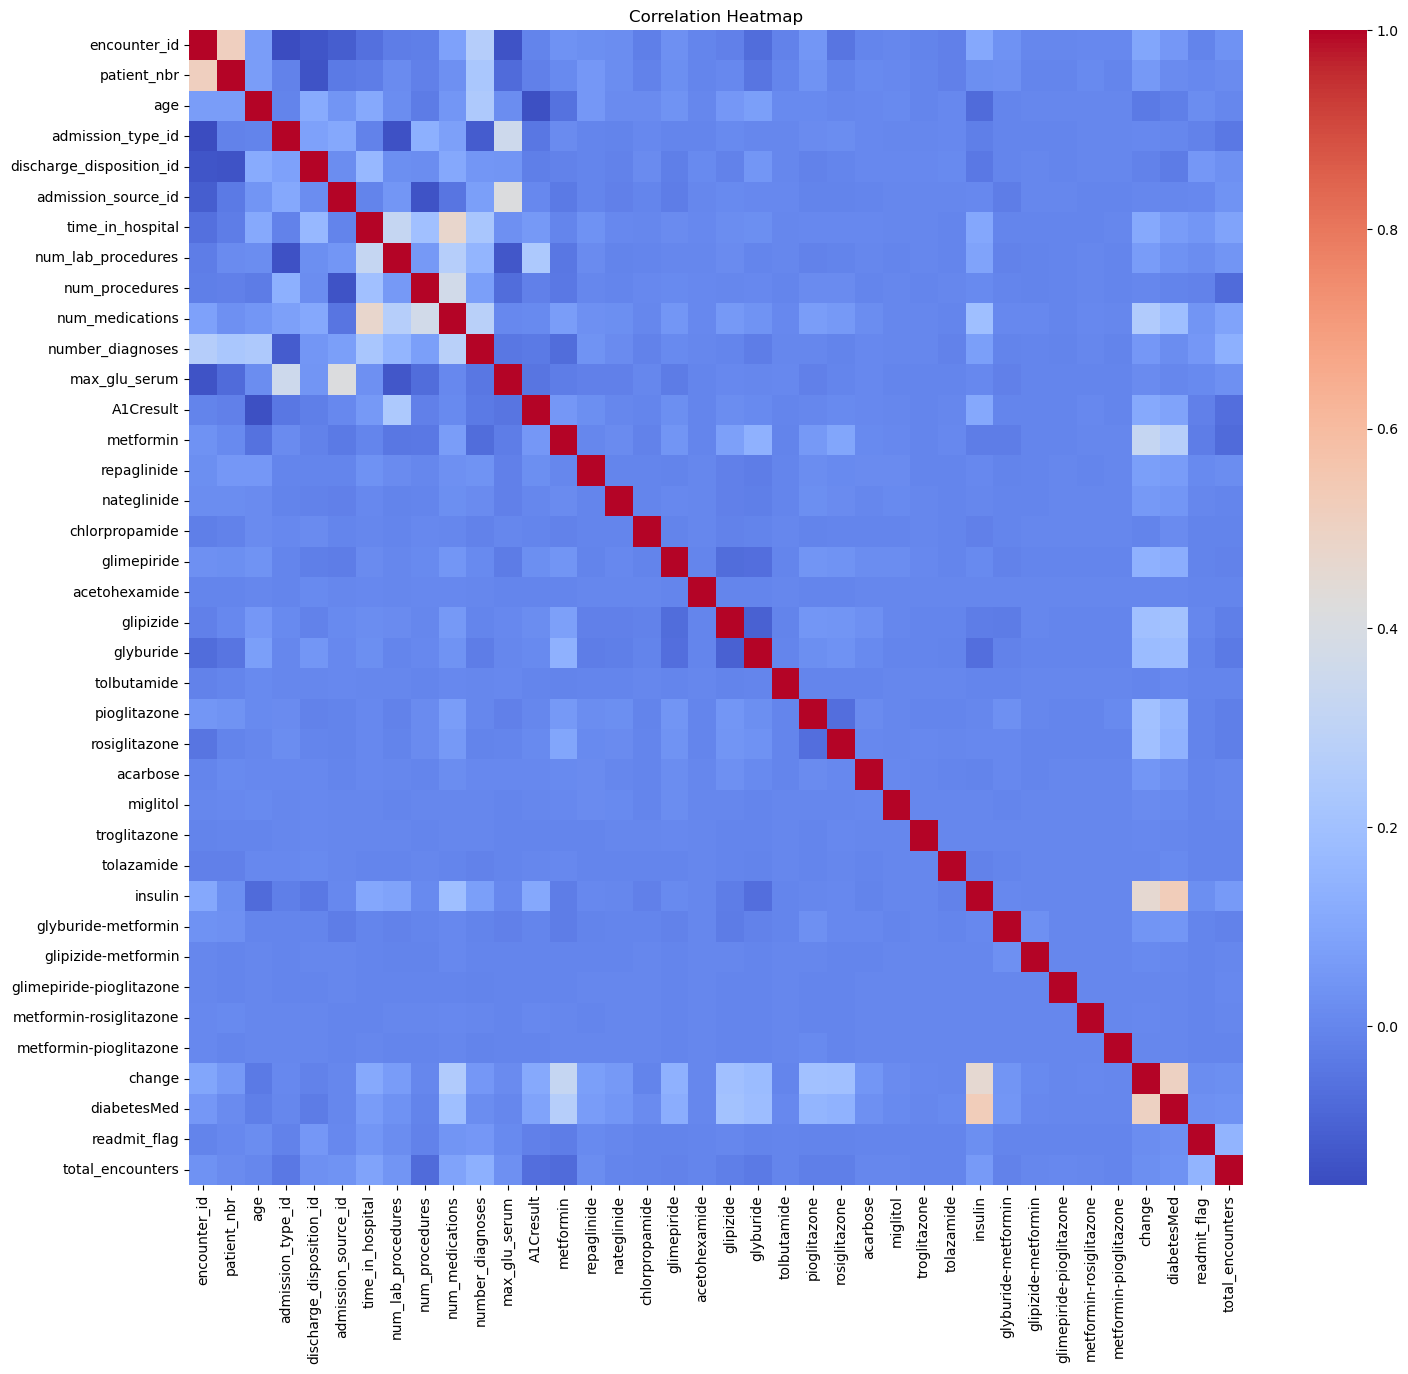

In [69]:
# Select only numeric features
numeric_features = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_features.corr()

# Plot heatmap
plt.figure(figsize=(17,15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

## 10. Model Training and Evaluation: XGBoost Classifier
This section implements the modeling pipeline using the XGBoost classifier after preparing the data with scaling and SMOTE to handle class imbalance.

In [71]:
!pip install imbalanced-learn

## 10.1  Install and Import Libraries
Required libraries include imbalanced-learn, XGBoost, scikit-learn, and visualization tools like seaborn and matplotlib.

In [76]:

# Step 1: Imports necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns


## 10.2 Feature and Target Definition
The target variable is readmit_flag, indicating whether a patient was readmitted within 30 days.

All other features are stored in X.

In [78]:

# Replace 'readmit_flag' with your actual target column if it's named differently
X = df.drop('readmit_flag', axis=1)
y = df['readmit_flag']


## 10.3 Feature Scaling
Features are standardized using StandardScaler to improve model performance and ensure uniformity across features.


In [ ]:

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 10.4 Class Imbalance Handling with SMOTE
Synthetic Minority Oversampling Technique (SMOTE) is applied to balance the classes in the dataset, improving the model’s ability to detect minority class events.

In [80]:

# Apply SMOTE to balance the classes in the target variable
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


## 10.5 Train-Test Split
The resampled data is split into training and testing sets with stratification to maintain the distribution of the target variable.

In [ ]:

# Split the resampled dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


## 10.6 XGBoost Model Training
An XGBClassifier is initialized and trained on the balanced training set.

The use_label_encoder=False flag and eval_metric='logloss' are set to suppress warnings and ensure proper evaluation.

In [82]:

# Initialize the XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)


C:\Users\mahwi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:21:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

##  10.7 Model Evaluation
The model’s predictions are evaluated using:

Confusion Matrix: to show TP, TN, FP, FN counts.

Classification Report: includes precision, recall, F1-score, and support for each class.

ROC-AUC Score: to measure the classifier’s ability to distinguish between classes.

ROC Curve: visual representation of model performance across thresholds.

In [84]:

# Make predictions on the test set
y_pred = model.predict(X_test)

# Predict probabilities for ROC-AUC evaluation
y_proba = model.predict_proba(X_test)[:, 1]


# Print the confusion matrix to evaluate TP, FP, TN, FN
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print a detailed classification report: precision, recall, F1-score, and support
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute and print the ROC-AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[18036    46]
 [ 2334 15748]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     18082
           1       1.00      0.87      0.93     18082

    accuracy                           0.93     36164
   macro avg       0.94      0.93      0.93     36164
weighted avg       0.94      0.93      0.93     36164

ROC-AUC Score: 0.9584389480918087


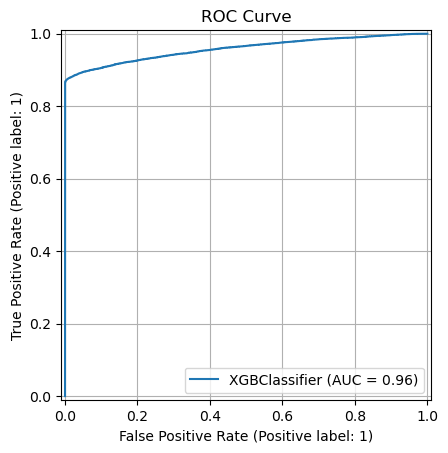

In [86]:

# Plot the ROC Curve to visually assess model performance
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.grid(True)
plt.show()


## 11. Feature Importance Analysis
Feature importances are extracted from the trained model.

The top 20 most important features are visualized using a bar plot to understand which variables most influence the prediction.

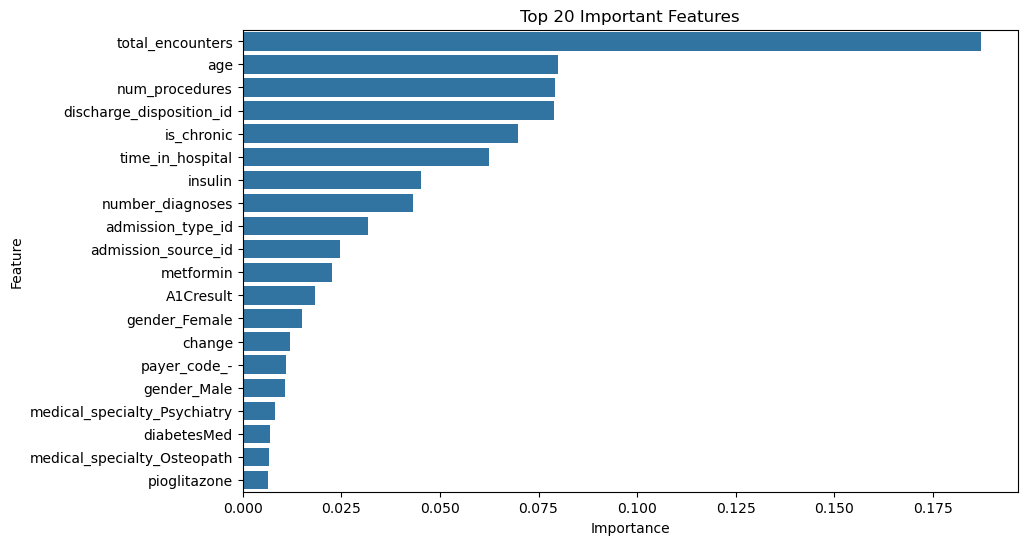

In [88]:

# Extract feature importances from the trained XGBoost model
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot top 20
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Important Features')
plt.show()